In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import datetime

# For visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# For modelling 
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# For scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# For automation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

# For metrics
from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score

# For suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#display option for panda dataframe
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Reading and Understanding Data

In [3]:
# Read the csv data into a dataframe
df= pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Check the shape of data
df.shape

(1460, 81)

In [5]:
# Check the info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Check basic stats
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Checking missing data
missing_values = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
missing_values.index.name = 'Features'
missing_values.head(25)

,Null %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


### Missing Value Treatment

### Below features missing values are valid values. These missing values are imputing with Actual values.
"Alley","MasVnrType", "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2", "FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond", "PoolQC","Fence","MiscFeature"

In [8]:
df['Alley'] = df['Alley'].fillna('No alley access')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('No Basement')
df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')
df['GarageType'] = df['GarageType'].fillna('No Garage')
df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')
df['GarageQual'] = df['GarageQual'].fillna('No Garage')
df['GarageCond'] = df['GarageCond'].fillna('No Garage')
df['PoolQC'] = df['PoolQC'].fillna('No Pool')
df['Fence'] = df['Fence'].fillna('No Fence')
df['MiscFeature'] = df['MiscFeature'].fillna('None')

In [9]:
# Checking missing data again
missing_values = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
missing_values.index.name = 'Features'
missing_values.head()

,Null %
Features,
LotFrontage,17.74
GarageYrBlt,5.55
MasVnrArea,0.55
Electrical,0.07
KitchenAbvGr,0.00


In [10]:
# Impute missing values with median of LotFrontage.
df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace= True)

#Impute missing value with mode(most frequently used value) for GarageYrBlt
df["GarageYrBlt"].fillna(df["GarageYrBlt"].mode()[0], inplace = True)

#Impute missing value with median as mean has very value compared to median which is 0. 
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace = True)

#Impute missing value with mode(most frequently used value) for Electrical
df["Electrical"].fillna(df["Electrical"].mode()[0], inplace = True)

In [11]:
# Convert the Year column values to age values as relationship of sale price can be better defined with age of house
import datetime
df["HouseAge"] =datetime.datetime.now().year - df["YearBuilt"]

df["RemodelAge"]=datetime.datetime.now().year - df["YearRemodAdd"]

df["GarageAge"] = datetime.datetime.now().year - df["GarageYrBlt"]

In [12]:
# drop the "YearBuilt","YearRemodAdd","GarageYrBlt" columns
df = df.drop(["YearBuilt","YearRemodAdd","GarageYrBlt"], axis = 1)

# Id column can be dropped
df= df.drop("Id", axis = 1)

## Visualize data

### Visualize numerical variables

In [13]:
# Visualize these numerical variabes to check the relationship with Saleprice
condition_num_vars = ['LotFrontage','LotArea', 'OverallQual', 'OverallCond','HouseAge', 'RemodelAge','MasVnrArea']
basement_num_vars = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
floor_num_vars = ['1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea']
bath_bedroom_num_vars = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','KitchenQual','TotRmsAbvGrd']
garage_num_vars = ["Fireplaces","GarageAge","GarageCars","GarageArea"]
porch_num_vars = ["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch"]
misc_num_vars=['PoolArea', 'MiscVal', 'MoSold', 'YrSold']

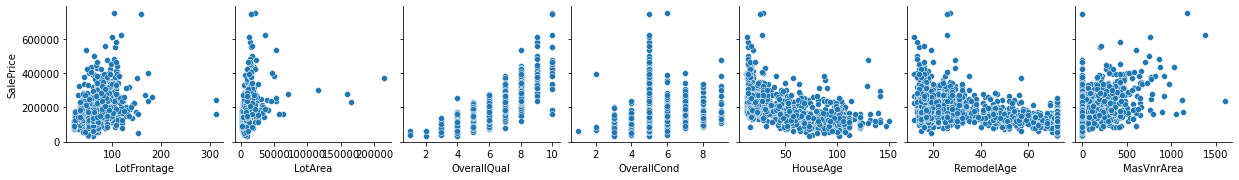

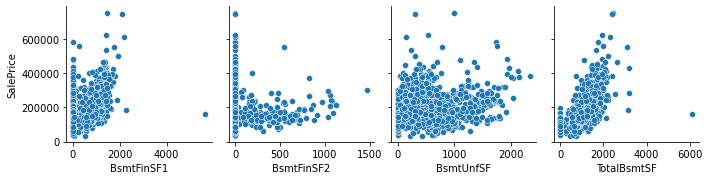

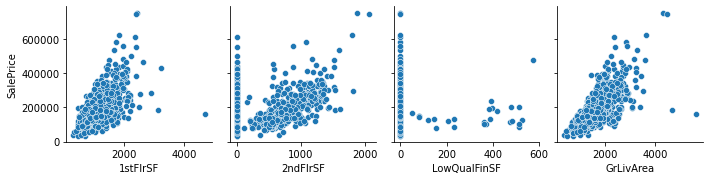

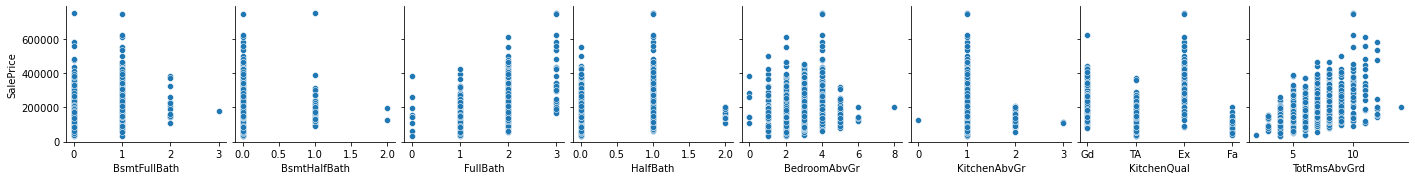

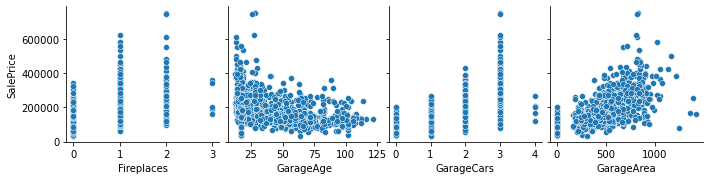

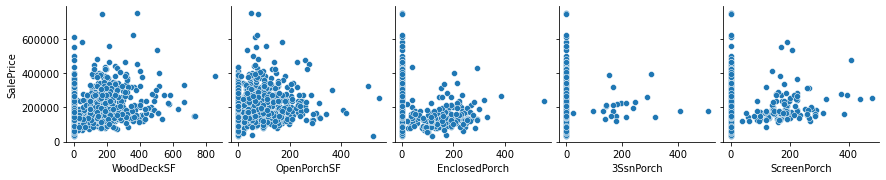

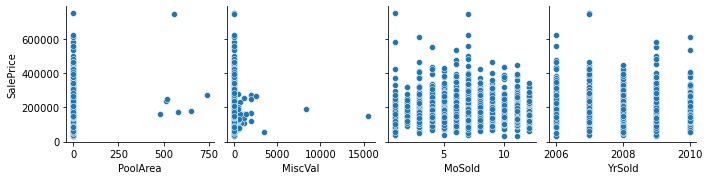

In [14]:
# Pairplot for numerical variables
sns.pairplot(df,x_vars = condition_num_vars, y_vars = ["SalePrice"])
sns.pairplot(df,x_vars = basement_num_vars, y_vars = ["SalePrice"])
sns.pairplot(df,x_vars = floor_num_vars, y_vars = ["SalePrice"])
sns.pairplot(df,x_vars = bath_bedroom_num_vars, y_vars = ["SalePrice"])
sns.pairplot(df,x_vars = garage_num_vars, y_vars = ["SalePrice"])
sns.pairplot(df,x_vars = porch_num_vars, y_vars = ["SalePrice"])
sns.pairplot(df,x_vars = misc_num_vars, y_vars = ["SalePrice"])
plt.show()

### Inference:
- There are outliers in LotFrontage, LotArea, MasVnrArea, BsmtFinSF1,LowQualFinSF, GrLivArea, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal
- There is linear relationship with SalePrice for HouseAge, RemodelAge, Total BsmtSF,1stFlrSF, 2ndFlrSF, GrLivArea
- Value across MoSold and YrSold seems almost constant


### Visualize categorical variable

In [15]:
# Separating the Numerical and Categorical features for analysis
numeric_df = df.select_dtypes(include=['int64', 'float64'])
categorical_df = df.select_dtypes(include=['object'])

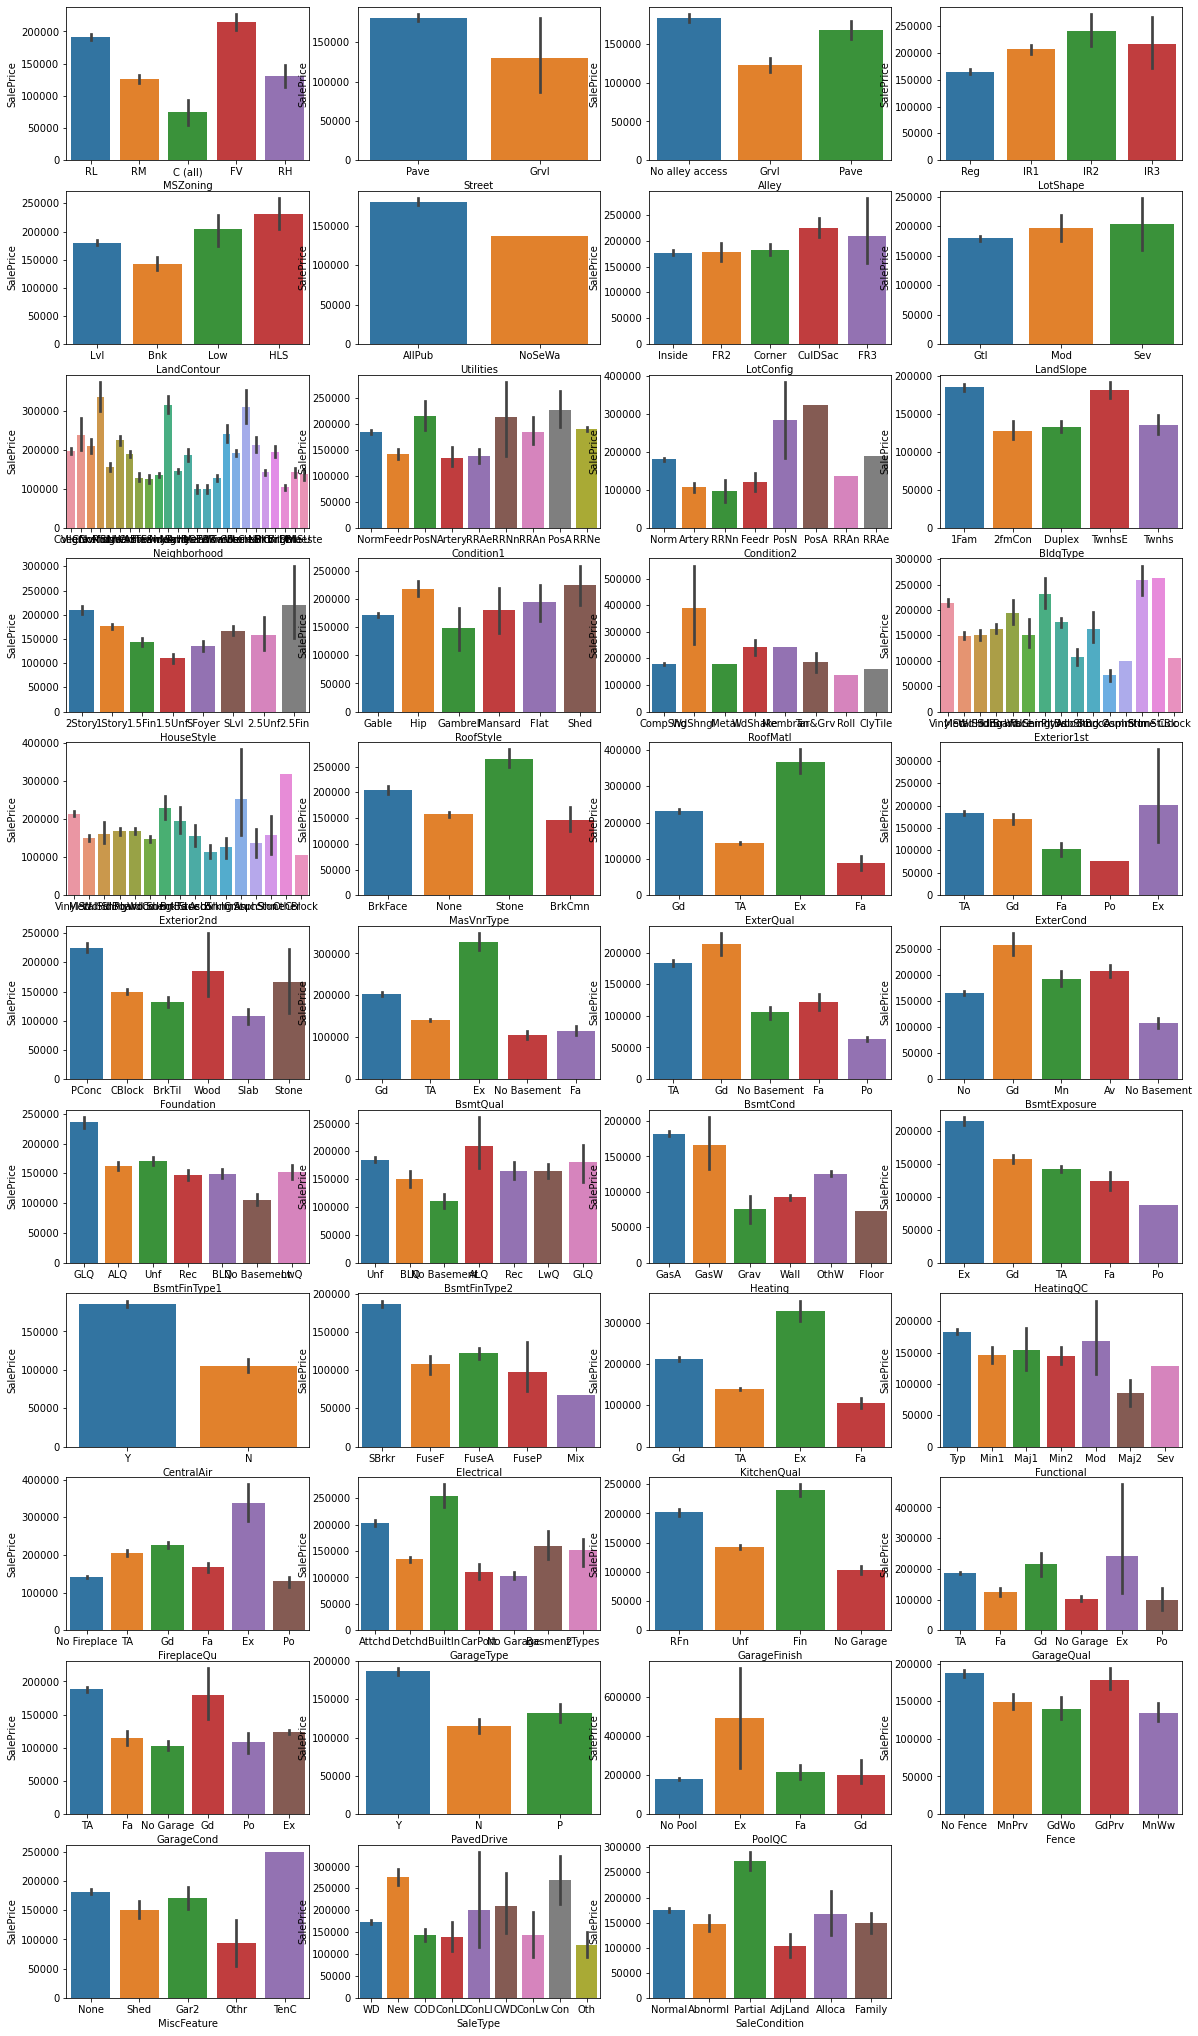

In [16]:
 plt.figure(figsize = (20,40))
for i, catcol in enumerate(categorical_df):
    plt.subplot(12,4,i+1)
    sns.barplot(x = catcol, y ='SalePrice', data = df)
plt.show()


### Inference
- Most of the houses have all the public utilities
- If the p roximity of house is near positive off-site feature--park, greenbelt, etc, then sale price is higher.
- House with Masonry veneer type 'stone' has high sale price
- House with excellent exterior material quality has high sale price
- House with excellent basement quality has high sale price
- House with excellent kitchen quality has high sale price
- House with excellent pool quality has high sale price



### Outlier Treatment

In [17]:
# Excluding discrete columns from numerical columns
discrete_col = ['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath',
          'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold']
outlier1 = numeric_df =numeric_df.drop(discrete_col, axis = 1)

# Find the outliers
outlier_df = []
res={}
index = 0
for feature in outlier1:
    q1 = df[feature].quantile(.25)
    q3 = df[feature].quantile(.75)
    iqr = q3 - q1
    lr = q1 - 1.5 * iqr 
    ur = q3 + 1.5 * iqr
    res["Feature"] = feature
    res["LowerRange"] = lr
    res["UpperRange"] = ur
    res["Min"] = min(df[feature])
    res["Max"] = max(df[feature])
    res["OutlierCount"] = df[(df[feature] > ur) | (df[feature] < lr)].shape[0]
    outlier_df.append(res.copy())
    
pd.DataFrame(outlier_df).sort_values(by='OutlierCount', ascending=False)  

,Feature,LowerRange,UpperRange,Min,Max,OutlierCount
14,EnclosedPorch,0.000,0.000,0.0,552.0,208
4,BsmtFinSF2,0.000,0.000,0.0,1474.0,167
16,ScreenPorch,0.000,0.000,0.0,480.0,116
0,LotFrontage,31.500,107.500,21.0,313.0,106
2,MasVnrArea,-246.375,410.625,0.0,1600.0,98
13,OpenPorchSF,-102.000,170.000,0.0,547.0,77
1,LotArea,1481.500,17673.500,1300.0,215245.0,69
19,SalePrice,3937.500,340037.500,34900.0,755000.0,61
6,TotalBsmtSF,42.000,2052.000,0.0,6110.0,61
18,MiscVal,0.000,0.000,0.0,15500.0,52


### Inference:
- Most of the numeric variables has outliers
- We should not drop these outliers as this will cause significnat data loss
- We should treat the outliers excludin the "SalePrice" target variable


In [18]:
# Treat the outlier values greater than upper range by setting it to upper range value
# Treat the outlier values lesser than lower range by setting it to lower range value
for outlier in outlier_df:
    
    if outlier["Feature"] != 'SalePrice':
        feature = outlier["Feature"]
        ur = outlier["UpperRange"]
        lr = outlier["LowerRange"]
        df[feature] = np.where(df[feature] > ur,ur,df[feature])
        df[feature] = np.where(df[feature] < lr,lr,df[feature])

In [19]:
# Checking the stats after tretaing the outliers for below features
df[['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
            'MiscVal', 'LowQualFinSF','BsmtFinSF2']].describe().T

,count,mean,std,min,25%,50%,75%,max
EnclosedPorch,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3SsnPorch,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ScreenPorch,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PoolArea,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MiscVal,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LowQualFinSF,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BsmtFinSF2,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Inference
- After treating the outliers, we can observer that there are constant values in BsmtFinSF2, LowQualFinSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal
- We can drop these columns as hese will not contribute to the Saleprice prediction

In [20]:
# drop the columns with constant values
df= df.drop(["EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "LowQualFinSF", "BsmtFinSF2"], axis = 1)

In [21]:
# Verifying outlier again
# Separating the Numerical and Categorical features for analysis
numeric_df = df.select_dtypes(include=['int64', 'float64'])
categorical_df = df.select_dtypes(include=['object'])

# Excluding discrete columns from numerical columns
discrete_col = ['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath',
          'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold']
outlier1 = numeric_df =numeric_df.drop(discrete_col, axis = 1)

# Find the outliers
outlier_df = []
res={}
index = 0
for feature in outlier1:
    q1 = df[feature].quantile(.25)
    q3 = df[feature].quantile(.75)
    iqr = q3 - q1
    lr = q1 - 1.5 * iqr 
    ur = q3 + 1.5 * iqr
    res["Feature"] = feature
    res["LowerRange"] = lr
    res["UpperRange"] = ur
    res["Min"] = min(df[feature])
    res["Max"] = max(df[feature])
    res["OutlierCount"] = df[(df[feature] > ur) | (df[feature] < lr)].shape[0]
    outlier_df.append(res.copy())
    
pd.DataFrame(outlier_df).sort_values(by='OutlierCount', ascending=False)  

,Feature,LowerRange,UpperRange,Min,Max,OutlierCount
12,SalePrice,3937.500,340037.500,34900.0,755000.000,61
0,LotFrontage,31.500,107.500,31.5,107.500,0
1,LotArea,1481.500,17673.500,1481.5,17673.500,0
2,MasVnrArea,-246.375,410.625,0.0,410.625,0
3,BsmtFinSF1,-1068.375,1780.625,0.0,1780.625,0
4,BsmtUnfSF,-654.500,1685.500,0.0,1685.500,0
5,TotalBsmtSF,42.000,2052.000,42.0,2052.000,0
6,1stFlrSF,118.125,2155.125,334.0,2155.125,0
7,2ndFlrSF,-1092.000,1820.000,0.0,1820.000,0
8,GrLivArea,158.625,2747.625,334.0,2747.625,0


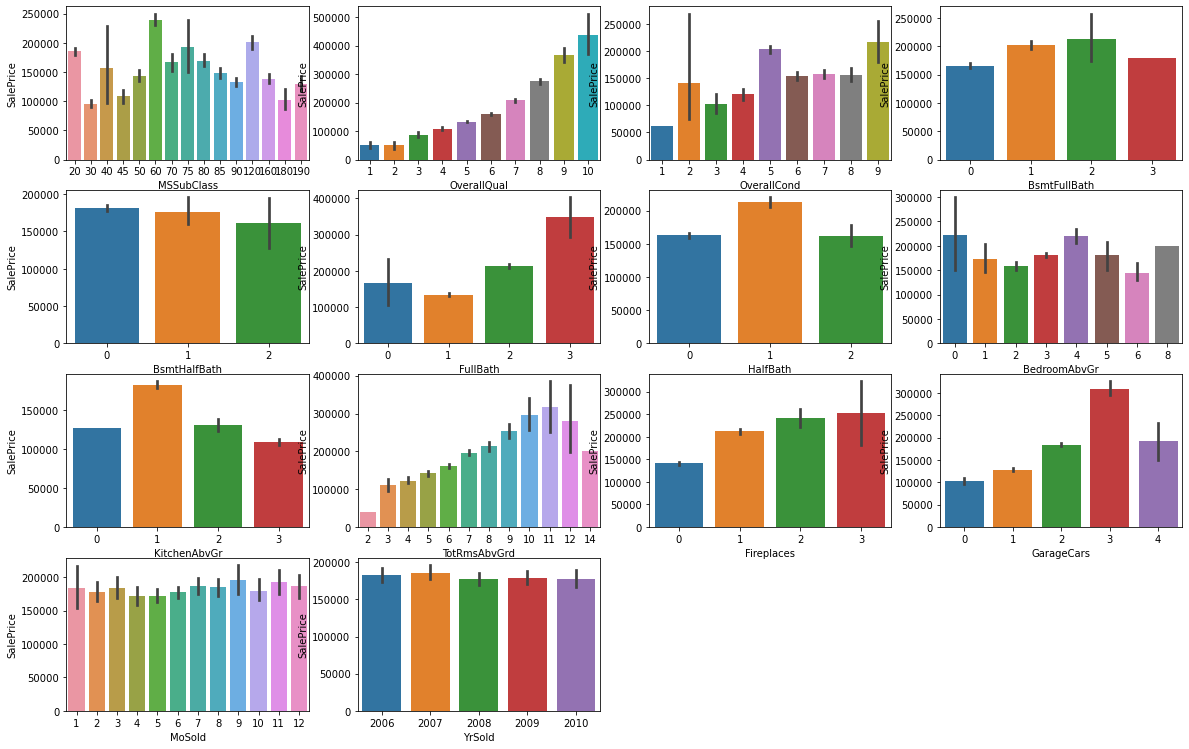

In [22]:
# Check the discrete value columns
discrete_cols = ['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath',
          'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold']


plt.figure(figsize = (20,40))
for i, col in enumerate(discrete_cols):
    plt.subplot(12,4,i+1)
    sns.barplot(x = col, y ='SalePrice', data = df)
plt.show()

### Inference:
- MoSold and YrSold does not show much change in SalePrice for different values. These columns can be dropped
- OverallQual shows a positive relationship(Better the quality, more the saleprice)
- SalePrice is highest for OverallCond = 5and 9
- TotRmsAbvGrd shows positive relationship with saleprice( ore the number of rooms, more the saleprice)

In [23]:
# drop MoSold and YrSold column
df = df.drop(["MoSold","YrSold"], axis = 1)

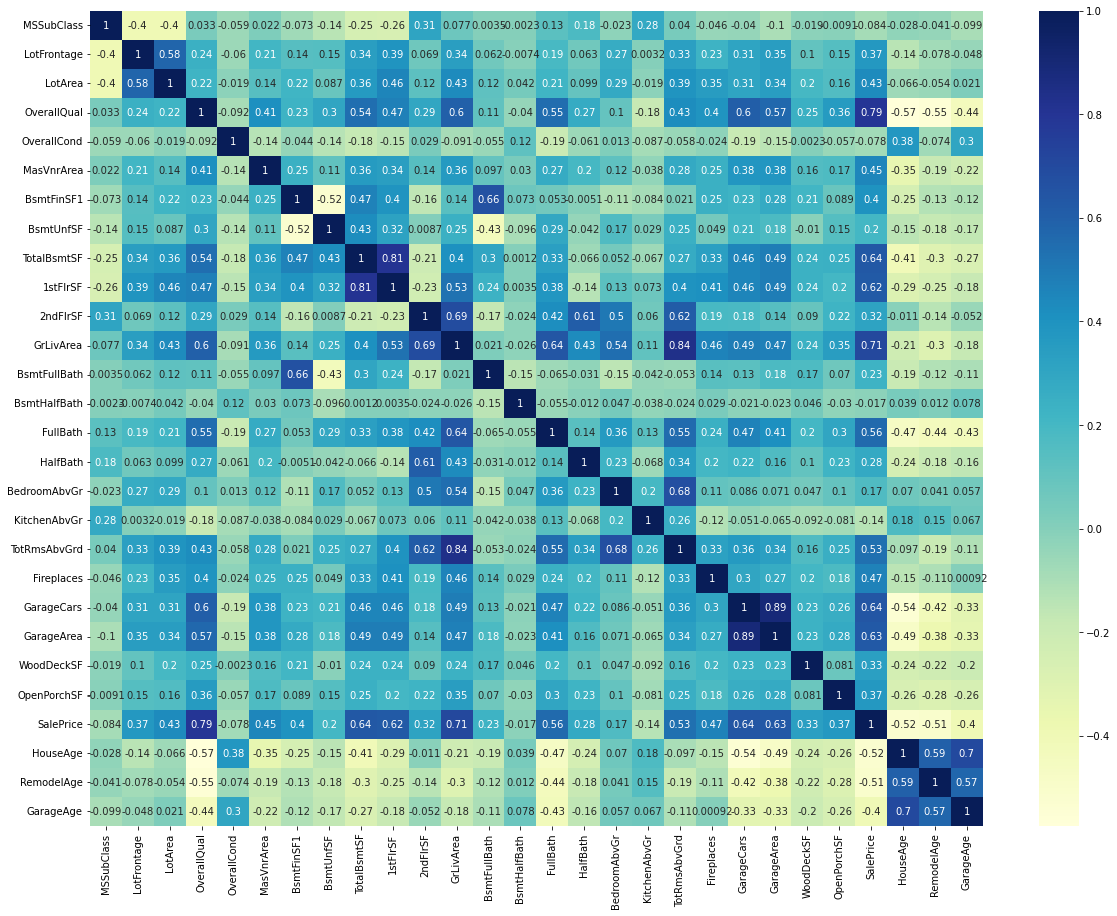

In [24]:
# Check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot = True, cmap ="YlGnBu")
plt.show()

In [25]:
correlation_1 = df.corr()
print(correlation_1['SalePrice'].sort_values(ascending = False), '\n')

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708153
GarageCars      0.640409
TotalBsmtSF     0.636999
GarageArea      0.630138
1stFlrSF        0.620743
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
MasVnrArea      0.448618
LotArea         0.432216
BsmtFinSF1      0.400330
LotFrontage     0.371542
OpenPorchSF     0.369024
WoodDeckSF      0.330378
2ndFlrSF        0.316547
HalfBath        0.284108
BsmtFullBath    0.227122
BsmtUnfSF       0.203278
BedroomAbvGr    0.168213
BsmtHalfBath   -0.016844
OverallCond    -0.077856
MSSubClass     -0.084284
KitchenAbvGr   -0.135907
GarageAge      -0.397788
RemodelAge     -0.507101
HouseAge       -0.524172
Name: SalePrice, dtype: float64 



Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'MasVnrArea', 'LotArea', 'BsmtFinSF1', 'LotFrontage', 'OpenPorchSF'], dtype='object')


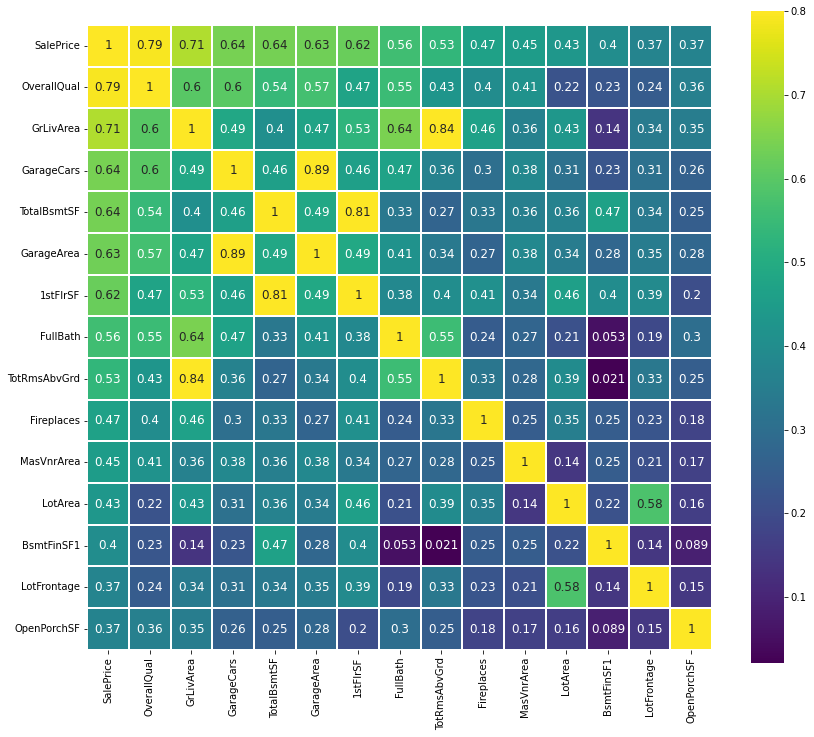

In [26]:
k=15
cols = correlation_1.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values, annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

### Inference:
- OverallQual, GrLivArea, GarageCars, TotalBsmtSF, GarageArea, 1stFlrSF has high correlation with SalePrice
- TotRmsAbvGrd and GrLivArea are highly correlated - 0.84
- 1stFlrSF and TotalBsmtSF is highly correlated - 0.81
- GarageCars and GarageArea is highly correlated - 0.89


In [27]:
# drop TotRmsAbvGrd as it is highly correlated with GrLivArea
df = df.drop("TotRmsAbvGrd", axis = 1)

# drop GarageArea as it is highly correlated with GarageCars
df = df.drop("GarageArea", axis = 1)

# drop 1stFlrSF as it is highly correlated with TotalBsmtSF
df = df.drop("1stFlrSF", axis = 1)


In [28]:
df.shape

(1460, 68)

### Dummy Variable creation

In [29]:
# Check the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(len(categorical_columns))
categorical_columns

43


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], dtype='object')

In [30]:
# Create the dummy variables for categorical variables
dummies = pd.get_dummies(df[categorical_columns], drop_first = True)
df = pd.concat([df, dummies], axis = 1)
df.drop(categorical_columns, axis = 1, inplace = True)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,HouseAge,RemodelAge,GarageAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal

In [31]:
# Check the shape of dataset
df.shape

(1460, 248)

### Splitting the Data into Training and Testing Sets

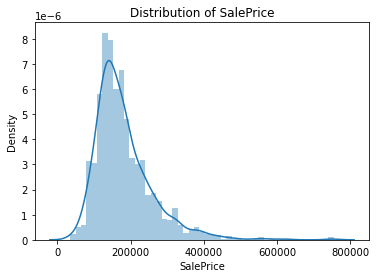

In [32]:
#Check the distribution of target variable "SalePrice"
sns.distplot(df["SalePrice"])
plt.title("Distribution of SalePrice")
plt.show()

***SalePrice distribution is right skewed. To apply the linear regression, the target variable should be normally distributed***

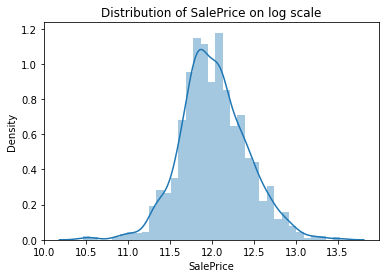

In [33]:
# Transform the saleprice on log scale and check the distribution
sns.distplot(np.log(df["SalePrice"]))
plt.title("Distribution of SalePrice on log scale")
plt.show()

#### Log transformed saleprice is normally distributed, hence can be used for linear regression model building

In [34]:
# log Transformation of SalePrice
df['SalePrice'] = np.log(df['SalePrice'])

In [35]:
# Separating the Numerical and Categorical features for analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(len(numerical_columns))
numerical_columns

#Rescaling the features
scaler = MinMaxScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


25


In [36]:
# Split the data into train and test data
y = df['SalePrice']

X = df.drop(['SalePrice'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [37]:
# Function to select top n features
def get_top_n_features(n):
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    rfe = RFE(lm,n_features_to_select=n)
    rfe = rfe.fit(X_train,y_train)
    top_n_features = X_train.columns[rfe.support_]
    return top_n_features

In [38]:
# Get top 30 features
top_30_features = get_top_n_features(30)

In [39]:
# Create a statsmodel Ordinary Least Square regression model for different set of features
def build_linearmodel(X_train_rfe):
    # Add a constant
    X_train_rfe_sm = sm.add_constant(X_train_rfe)

    # Create a first fitted model
    lr = sm.OLS(y_train.values.reshape(-1,1),X_train_rfe_sm)
    lr_model = lr.fit()

    # Print the summary
    print(lr_model.summary())

In [40]:
# Build linear model with 30 feature selection
build_linearmodel(X_train[top_30_features])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     316.6
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:02:56   Log-Likelihood:                 1856.0
No. Observations:                1022   AIC:                            -3650.
Df Residuals:                     991   BIC:                            -3497.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3812    

In [41]:
# dataframe for top 30 selected features
X_train_rfe = X_train[top_30_features]
X_test_rfe = X_test[top_30_features]

In [42]:
# Build a linear regression model
lm = LinearRegression()
lm.fit(X_train_rfe,y_train)

LinearRegression()

In [43]:
def Checkmetric(y_pred_train, y_pred_test):
    print("R2 Score train = ", r2_score(y_train, y_pred_train))
    print("R2 Score test = ", r2_score(y_test, y_pred_test))

    print("RSS score train = ", np.sum(np.square(y_train - y_pred_train)))
    print("RSS score test = ", np.sum(np.square(y_test - y_pred_test)))

    print("RMSE score train = ",  np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("RMSE score test = ", np.sqrt(mean_squared_error(y_test, y_pred_test)))

    metric = []
    metric.append(r2_score(y_train, y_pred_train))
    metric.append(r2_score(y_test, y_pred_test))
    metric.append(np.sum(np.square(y_train - y_pred_train)))
    metric.append(np.sum(np.square(y_test - y_pred_test)))
    metric.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    metric.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    return metric

In [44]:
# Check the different metrics
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

lrmetric = Checkmetric(y_pred_train,y_pred_test)


R2 Score train =  0.9055312908353919
R2 Score test =  0.8783705425934683
RSS score train =  1.5834830726859872
RSS score test =  0.9562775356976998
RMSE score train =  0.039362372297940956
RMSE score test =  0.046725603741117325


- LinearRegression model is able to achieve the r2 socre = 0.878 for test data which is very near to r2 score of train data.
- RMSE for the test data is 0467, which means that the prediction made by the model can vary by 0467 unit 

We will check if Ridge and Lasso regression further improves the r2 score of test data and avoids overfitting.

## Ridge and Lasso Regression

### Ridge Regression

In [45]:
# Perform Grid search cross validation for different value of alpha
params = {"alpha":[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
                   1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]}
ridge =Ridge()
folds=5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params , 
                        scoring = "neg_mean_absolute_error", 
                        cv = folds, 
                        verbose = 1, 
                        return_train_score = True)
model_cv.fit(X_train_rfe,y_train)
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 1.0}


### Optimum value of Ridge Regression lambda = 1

In [46]:
# Fit Ridge Regression model for optimum value of lambda
alpha = model_cv.best_params_["alpha"]
ridge =Ridge(alpha = alpha)
ridge.fit(X_train_rfe,y_train)
print(ridge.coef_)

[ 0.05773765  0.22783343  0.12671162 -0.05056717  0.13681522  0.22563219
 -0.10224378  0.09363407 -0.11362136  0.06645812  0.03497763  0.0439184
  0.02483157 -0.11788667  0.0602287   0.0495502   0.02307599  0.05651366
  0.03961314  0.07328092 -0.06973542 -0.04793831 -0.07286814 -0.05951901
 -0.09729574 -0.02071664  0.04176695  0.03933414  0.03795999  0.04729993]


In [47]:
# Check the different metrics
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

rgmetric = Checkmetric(y_pred_train,y_pred_test)


R2 Score train =  0.8965501488738666
R2 Score test =  0.8987442357011586
RSS score train =  1.734024838263462
RSS score test =  0.7960950811056019
RMSE score train =  0.041190988012045494
RMSE score test =  0.04263295296274106


- Ridge Regression model is able to achieve the r2 socre = 0.898 for test data which is very near to r2 score of train data.
- RMSE for the test data is 0.0426, which means that the prediction made by the model can vary by 0.0426 unit 

### Lasso Regression

In [48]:
# Perform Grid search cross validation for different value of alpha
lasso =Lasso()
folds=5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params , 
                        scoring = "neg_mean_absolute_error", 
                        cv = folds, 
                        verbose = 1, 
                        return_train_score = True)
model_cv.fit(X_train_rfe,y_train)
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.0001}


### Optimum value of Lasso Regression lambda = 0.0001

In [49]:
# Fit Lasso Regression model for optimum value of lambda
alpha = model_cv.best_params_["alpha"]
lasso =Lasso(alpha = alpha)
lasso.fit(X_train_rfe,y_train)
print(lasso.coef_)

[ 0.05403127  0.2375103   0.1295224  -0.05046813  0.13718086  0.22684137
 -0.10294043  0.09134135 -0.11216961  0.04007893  0.00552228  0.01935852
 -0.         -0.12765631  0.01020971  0.         -0.          0.
  0.          0.01441536 -0.04703643 -0.02916401 -0.05603005 -0.04799638
 -0.08401696 -0.          0.00814655  0.00248043  0.          0.        ]


In [50]:
# Check the different metrics
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

lsmetric = Checkmetric(y_pred_train,y_pred_test)

R2 Score train =  0.8919650588916551
R2 Score test =  0.8976228077546613
RSS score train =  1.810880047123392
RSS score test =  0.8049119941791727
RMSE score train =  0.04209392218428389
RMSE score test =  0.042868387150059965


- Lasso Regression model is able to achieve the r2 socre = 0.897 for test data which is very near to r2 score of train data.
- RMSE for the test data is 0.042, which means that the prediction made by the model can vary by 0.042 unit 

In [51]:
# Compare the different metrics for Linear Regression, Ridge Regression and Lassoregression
metric_sr = pd.Series(["R2 Score (train)","R2 Score (test)","RSS (train)","RSS (test)","RMSE (train)","RMSE (test)"], name = "Metric")
lrmetric_sr = pd.Series(lrmetric, name = "LinearRegression")
rgmetric_sr = pd.Series(rgmetric, name = "RidgeRegression")
lsmetric_sr = pd.Series(lsmetric, name = "LassoRegression")

finalmetric = pd.concat([metric_sr,lrmetric_sr,rgmetric_sr,lsmetric_sr], axis = 1)
finalmetric

,Metric,LinearRegression,RidgeRegression,LassoRegression
0,R2 Score (train),0.905531,0.896550,0.891965
1,R2 Score (test),0.878371,0.898744,0.897623
2,RSS (train),1.583483,1.734025,1.810880
3,RSS (test),0.956278,0.796095,0.804912
4,RMSE (train),0.039362,0.041191,0.042094
5,RMSE (test),0.046726,0.042633,0.042868


### Inference:
- R2 score of test data for Linear, Ridge and Lasso is almost same.
- R2 score of test data is for Ridge Regression model is slightly better than others

In [52]:
# Compare the coefficients
betas = pd.DataFrame(index=X_train_rfe.columns)
betas.rows = X_train_rfe.columns
betas["Linear"] = lm.coef_
betas["Ridge(1.0)"] = ridge.coef_
betas["Lasso(0.0001)"] = lasso.coef_
betas.head(60)

,Linear,Ridge(1.0),Lasso(0.0001)
LotArea,0.058274,0.057738,0.054031
OverallQual,0.238441,0.227833,0.237510
OverallCond,0.128208,0.126712,0.129522
BsmtUnfSF,-0.056308,-0.050567,-0.050468
TotalBsmtSF,0.144039,0.136815,0.137181
GrLivArea,0.236509,0.225632,0.226841
KitchenAbvGr,-0.120915,-0.102244,-0.102940
GarageCars,0.083692,0.093634,0.091341
HouseAge,-0.114060,-0.113621,-0.112170
MSZoning_FV,0.109007,0.066458,0.040079


In [53]:
# Get the top 10 coefficients of Ridge regression model
betas[["Ridge(1.0)"]].sort_values(by = "Ridge(1.0)" , ascending = False)[0:10]

,Ridge(1.0)
OverallQual,0.227833
GrLivArea,0.225632
TotalBsmtSF,0.136815
OverallCond,0.126712
GarageCars,0.093634
RoofMatl_WdShngl,0.073281
MSZoning_FV,0.066458
RoofMatl_CompShg,0.060229
LotArea,0.057738
RoofMatl_Tar&Grv,0.056514


In [54]:
# Get the top 10 coefficients of Lasso regression model
betas[["Lasso(0.0001)"]].sort_values(by = "Lasso(0.0001)" , ascending = False)[0:10]

,Lasso(0.0001)
OverallQual,0.237510
GrLivArea,0.226841
TotalBsmtSF,0.137181
OverallCond,0.129522
GarageCars,0.091341
LotArea,0.054031
MSZoning_FV,0.040079
MSZoning_RL,0.019359
RoofMatl_WdShngl,0.014415
RoofMatl_CompShg,0.010210


###  Ridge Regression model coefficnets for its slight better score of r2 score for test data


### Final Model

#### Top 10 features are :
- OverallQual	  : overall material and finish of the house
- GrLivArea : Above grade (ground) living area square feet	
- TotalBsmtSF	  : Total square feet of basement area
- OverallCond : overall condition of the house
- GarageCars : Size of garage in car capacity
- LotArea : Lot size in square feet
- MSZoning_FV : Floating Village Residential
- MSZoning_RL : Residential Low Density	
- RoofMatl_WdShngl  : Wood Shingles	
- RoofMatl_CompShg : Standard (Composite) Shingle
    

## Calculation For Subjective Question's Answer

### Question1: Impact of doubling the alpha for Ridge and Lasso 

In [55]:
# Fit Ridge Regression model for optimum value of lambda
alpha = 1.0*2
ridge =Ridge(alpha = alpha)
ridge.fit(X_train_rfe,y_train)
print(ridge.coef_)

[ 0.05841078  0.22114341  0.12256435 -0.0475015   0.13382624  0.21983848
 -0.08899581  0.09678888 -0.11368598  0.05294512  0.01980704  0.03085623
  0.01100153 -0.08586159  0.03608235  0.02465091  0.00568449  0.02798381
  0.01800091  0.04730967 -0.05324672 -0.0370689  -0.0598343  -0.05061489
 -0.06264812 -0.00979273  0.0283146   0.028961    0.02698997  0.03015932]


In [56]:
# Check the different metrics
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

rgmetric = Checkmetric(y_pred_train,y_pred_test)

R2 Score train =  0.8926163875659991
R2 Score test =  0.8971624586191599
RSS score train =  1.7999624857456702
RSS score test =  0.8085313602952805
RMSE score train =  0.04196684095184164
RMSE score test =  0.042964660010368715


In [57]:
# Fit Lasso Regression model for optimum value of lambda
alpha = 0.0001*2
lasso =Lasso(alpha = alpha)
lasso.fit(X_train_rfe,y_train)
print(lasso.coef_)

[ 0.05174351  0.2403484   0.12836629 -0.0473187   0.13436602  0.22242853
 -0.07971335  0.09177342 -0.11285196  0.03186836  0.          0.0137912
 -0.00527883 -0.07342122  0.00622716  0.         -0.         -0.
  0.          0.         -0.         -0.         -0.02874833 -0.02230471
 -0.         -0.          0.          0.          0.          0.        ]


In [58]:
# Check the different metrics
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

lsmetric = Checkmetric(y_pred_train,y_pred_test)

R2 Score train =  0.8926163875659991
R2 Score test =  0.8971624586191599
RSS score train =  1.7999624857456702
RSS score test =  0.8085313602952805
RMSE score train =  0.04196684095184164
RMSE score test =  0.042964660010368715


### Compare the metrics before and after doubling the alpha

In [59]:
rgmetric_sr_double = pd.Series(rgmetric, name = "RidgeRegression - Double Alpha")
lsmetric_sr_double = pd.Series(lsmetric, name = "LassoRegression - Double Alpha")

testmetric = pd.concat([metric_sr,rgmetric_sr,rgmetric_sr_double, lsmetric_sr,lsmetric_sr_double], axis = 1)
testmetric

,Metric,RidgeRegression,RidgeRegression - Double Alpha,LassoRegression,LassoRegression - Double Alpha
0,R2 Score (train),0.896550,0.892616,0.891965,0.892616
1,R2 Score (test),0.898744,0.897162,0.897623,0.897162
2,RSS (train),1.734025,1.799962,1.810880,1.799962
3,RSS (test),0.796095,0.808531,0.804912,0.808531
4,RMSE (train),0.041191,0.041967,0.042094,0.041967
5,RMSE (test),0.042633,0.042965,0.042868,0.042965


In [60]:
### Compare the coefficients before and after doubling the alpha
betas_after = pd.DataFrame(index=X_train_rfe.columns)
betas_after.rows = X_train_rfe.columns
betas_after["Linear"] = lm.coef_
betas_after["Ridge(2.0)"] = ridge.coef_
betas_after["Lasso(0.0002)"] = lasso.coef_
betas_after.head(60)

,Linear,Ridge(2.0),Lasso(0.0002)
LotArea,0.058274,0.058411,0.051744
OverallQual,0.238441,0.221143,0.240348
OverallCond,0.128208,0.122564,0.128366
BsmtUnfSF,-0.056308,-0.047502,-0.047319
TotalBsmtSF,0.144039,0.133826,0.134366
GrLivArea,0.236509,0.219838,0.222429
KitchenAbvGr,-0.120915,-0.088996,-0.079713
GarageCars,0.083692,0.096789,0.091773
HouseAge,-0.114060,-0.113686,-0.112852
MSZoning_FV,0.109007,0.052945,0.031868


In [61]:
# Get the top 10 coefficients of Ridge regression model
betas_after[["Ridge(2.0)"]].sort_values(by = "Ridge(2.0)" , ascending = False)[0:10]

,Ridge(2.0)
OverallQual,0.221143
GrLivArea,0.219838
TotalBsmtSF,0.133826
OverallCond,0.122564
GarageCars,0.096789
LotArea,0.058411
MSZoning_FV,0.052945
RoofMatl_WdShngl,0.047310
RoofMatl_CompShg,0.036082
MSZoning_RL,0.030856


In [62]:
# Get the top 10 coefficients of Lasso regression model
betas_after[["Lasso(0.0002)"]].sort_values(by = "Lasso(0.0002)" , ascending = False)[0:10]

,Lasso(0.0002)
OverallQual,0.240348
GrLivArea,0.222429
TotalBsmtSF,0.134366
OverallCond,0.128366
GarageCars,0.091773
LotArea,0.051744
MSZoning_FV,0.031868
MSZoning_RL,0.013791
RoofMatl_CompShg,0.006227
MiscFeature_None,0.000000


### Question3: Model comparison after dropping top 5 features

In [63]:
# Drop top 5 features 
X_train_rfe = X_train_rfe.drop(["OverallQual","GrLivArea","TotalBsmtSF","OverallCond","GarageCars"], axis = 1)
X_test_rfe = X_test_rfe.drop(["OverallQual","GrLivArea","TotalBsmtSF","OverallCond","GarageCars"], axis = 1)

In [64]:
# Perform Grid search cross validation for different value of alpha
params = {"alpha":[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
                   1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]}
ridge =Ridge()
folds=5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params , 
                        scoring = "neg_mean_absolute_error", 
                        cv = folds, 
                        verbose = 1, 
                        return_train_score = True)
model_cv.fit(X_train_rfe,y_train)
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 1.0}


In [65]:
# Fit Ridge Regression model for optimum value of lambda
alpha = model_cv.best_params_["alpha"]
ridge =Ridge(alpha = alpha)
ridge.fit(X_train_rfe,y_train)
print(ridge.coef_)

[ 0.2467964   0.0475382  -0.08310503 -0.25977211  0.08576334  0.0338402
  0.04126604  0.04928923 -0.01721014  0.02777952 -0.02510856  0.0044105
  0.01400787  0.00780048  0.15383239 -0.16527265 -0.02954346 -0.16659395
 -0.1114418  -0.08370486 -0.00405806  0.08488327  0.048019    0.03319212
  0.01281019]


In [66]:
# Check the different metrics
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

rgmetric = Checkmetric(y_pred_train,y_pred_test)

R2 Score train =  0.5581385877877816
R2 Score test =  0.538137957907506
RSS score train =  7.406474301369011
RSS score test =  3.6312609203566097
RMSE score train =  0.08512954501126424
RMSE score test =  0.09105245766302125


In [67]:
# Perform Grid search cross validation for different value of alpha
lasso =Lasso()
folds=5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params , 
                        scoring = "neg_mean_absolute_error", 
                        cv = folds, 
                        verbose = 1, 
                        return_train_score = True)
model_cv.fit(X_train_rfe,y_train)
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.0001}


In [68]:
# Fit Lasso Regression model for optimum value of lambda
alpha = model_cv.best_params_["alpha"]
lasso =Lasso(alpha = alpha)
lasso.fit(X_train_rfe,y_train)
print(lasso.coef_)

[ 0.24858307  0.0468572  -0.0829717  -0.26368125  0.04994505  0.
  0.00606928  0.01538684 -0.          0.01735568 -0.         -0.
  0.         -0.          0.15660031 -0.19405755 -0.00554219 -0.18117244
 -0.11239702 -0.06205094 -0.          0.08449653  0.01616071  0.
  0.        ]


In [69]:
# Check the different metrics
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

lsmetric = Checkmetric(y_pred_train,y_pred_test)

R2 Score train =  0.5565410030673286
R2 Score test =  0.5287647708090839
RSS score train =  7.433252992264546
RSS score test =  3.7049549781221853
RMSE score train =  0.08528330244195297
RMSE score test =  0.09197174196411453


### Compare the metrics before and after dropping top 5 features

In [70]:
rgmetric_sr_drop = pd.Series(rgmetric, name = "RidgeRegression - Drop Top5")
lsmetric_sr_drop = pd.Series(lsmetric, name = "LassoRegression - Drop Top5")

test1metric = pd.concat([metric_sr,rgmetric_sr,rgmetric_sr_drop, lsmetric_sr,lsmetric_sr_drop], axis = 1)
test1metric

,Metric,RidgeRegression,RidgeRegression - Drop Top5,LassoRegression,LassoRegression - Drop Top5
0,R2 Score (train),0.896550,0.558139,0.891965,0.556541
1,R2 Score (test),0.898744,0.538138,0.897623,0.528765
2,RSS (train),1.734025,7.406474,1.810880,7.433253
3,RSS (test),0.796095,3.631261,0.804912,3.704955
4,RMSE (train),0.041191,0.085130,0.042094,0.085283
5,RMSE (test),0.042633,0.091052,0.042868,0.091972


In [71]:
### Compare the coefficients before and after doubling the alpha
betas_afterdrop = pd.DataFrame(index=X_train_rfe.columns)
betas_afterdrop.rows = X_train_rfe.columns
betas_afterdrop["Ridge after drop"] = ridge.coef_
betas_afterdrop["Lasso after drop"] = lasso.coef_


In [72]:
# Get the top 10 coefficients of Ridge regression model
betas_afterdrop[["Ridge after drop"]].sort_values(by = "Ridge after drop" , ascending = False)[0:10]

,Ridge after drop
LotArea,0.246796
RoofMatl_WdShngl,0.153832
MSZoning_FV,0.085763
GarageCond_Po,0.084883
MSZoning_RM,0.049289
MiscFeature_None,0.048019
BsmtUnfSF,0.047538
MSZoning_RL,0.041266
MSZoning_RH,0.033840
MiscFeature_Shed,0.033192


In [73]:
# Get the top 10 coefficients of Lasso regression model
betas_afterdrop[["Lasso after drop"]].sort_values(by = "Lasso after drop" , ascending = False)[0:10]

,Lasso after drop
LotArea,0.248583
RoofMatl_WdShngl,0.156600
GarageCond_Po,0.084497
MSZoning_FV,0.049945
BsmtUnfSF,0.046857
RoofMatl_CompShg,0.017356
MiscFeature_None,0.016161
MSZoning_RM,0.015387
MSZoning_RL,0.006069
MiscFeature_Shed,0.000000
